# Document Clustering
Priscilla (0206021810012)

## Preprocessing

In [1]:
import re
import string

* tentukan dokumen yang hendak di clustering, pada kali ini dokumen yang saya gunakan berasal dari file "Buku_Putih_Benturan_NU_PKI.txt", dengan tiap dokumen adalah 1 baris dalam buku tersebut
* preprocessing dokumen: semua dibuat lower case, lalu semua angka dan simbol dihilangkan

In [2]:
# texts = ["Buku_Putih_Benturan_NU_PKI.txt", "DalihPembunuhanMassal.txt", "kitab_merah.txt", "mematahkan_pewarisan_ingatan.txt"]
texts = ["Buku_Putih_Benturan_NU_PKI.txt"]
corpus = []

for text in texts:
    with open(text, "r", encoding='utf-8') as f:
        isi_buku = f.readlines()
        for line in isi_buku:
            doc = line.lower()
            doc = re.sub(r'\d+', '', doc) #remove all numbers
            doc = doc.translate(str.maketrans('', '', string.punctuation)) #remove all symbols
            if len(doc)>50: corpus.append(doc) 

## Keyword Extraction

* seleksi dokumen, kata-kata yang sering muncul dalam dokumen (stopwords) tidak diikutkan. seleksi stopword menggunakan library nltk.
* hitung tf-idf setiap kata dengan TfidfVectorizer

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords

stopword = stopwords.words('indonesian')
stopword.extend(['ut', 'sdr', 'di', 'the', 'itu', 'yang', 'no', 
                 'bab', 'it', 'ita', 'jangan', 'dalam', 'gs','baiknya', 
                 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'])

vectorizer = TfidfVectorizer(stop_words=stopword)
X = vectorizer.fit_transform(corpus)

## K-Means Clustering

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

temukan jumlah cluster yang cocok dengan menggunakan elbow method

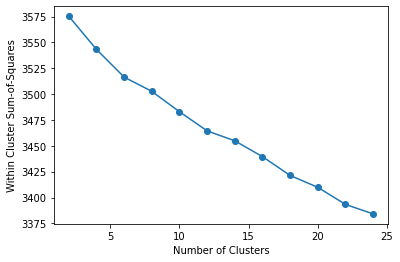

In [6]:
wcss=[] #within cluster sum-of-squares
for i in range(2, 26, 2):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 26, 2), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()

karena perubahan WCSS tidak terlalu berubah banyak sejak cluster 5, maka jumlah cluster yang ditetapkan adalah 5

In [7]:
km_model = KMeans(n_clusters=5, n_init=5, max_iter = 500)
y_kmeans = km_model.fit_predict(X)
clusters = y_kmeans

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

## Gambar plot clustering

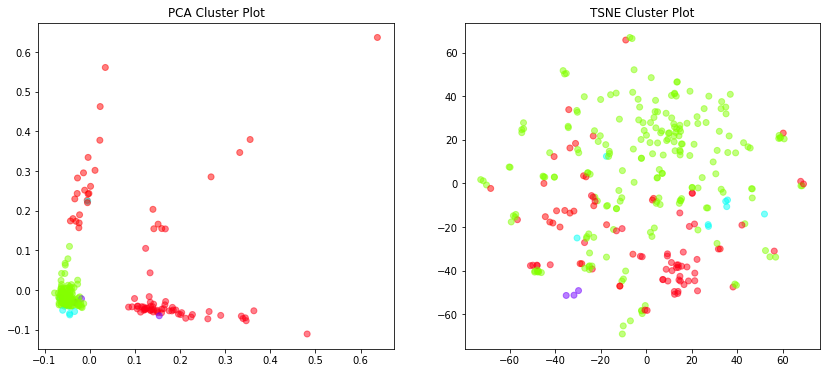

In [9]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset, alpha=0.5, cmap='pastel1')
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset, alpha=0.5, cmap='pastel1')
    ax[1].set_title('TSNE Cluster Plot')

plot_tsne_pca(X, clusters)

**Tentukan top 3 words dari tiap cluster**

In [10]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X, clusters, vectorizer.get_feature_names(), 3)


Cluster 0
kalangan,pki,nu

Cluster 1
kalangan,kiai,ansor

Cluster 2
pemberontakan,madiun,peristiwa

Cluster 3
orang,pki,anggota

Cluster 4
korban,orang,pki
